# ML Project Assignment

Create and deploy an ML project by importing the load_breast_cancer dataset from sklearn.datasets and apply the following steps:
1. Create a folder in which you want to create the project. After that, use the git init command and the necessary commands to create the specific Git repository.
2. Create a separate environment so that you do not mess up with your base environment.
3. Create the folder structure/directories and files using the Python program required for an ML project. You can refer to the following project structure:
```
    - src
      |-- __init__.py
      |-- logger.py
      |-- exception.py
      |-- utils.py
      |-- components
          |-- __init__.py
          |-- data_ingestion.py
          |-- data_transformation.py
          |-- model_trainer.py
      |-- pipelines
          |-- __init__.py
          |-- predict_pipeline.py
          |-- train_pipeline.py
      |-- import_data.py
      |-- setup.py
      |-- notebooks
      |-- requirements.txt
```   
        
        After this, update the created folders and files to your Git repository by pushing from your end and add the following files from GitHub and pull them to your source code:
        * README.md
        * LICENSE
        * .gitignore  
4. Write the program for setup.py and the relevant dependencies in requirements.txt and generate the egg-info folder.
5. Write the logging function in logger.py and the exception function in exception.py file to be used for the project to track the progress when the ML project is run and to raise any exceptions when encountered.
6. Create a Jupyter Notebook to perform the following tasks related to the breast cancer dataset:
    * Exploratory Data Analysis
    * Feature Selection
    * Model Training
    * Model Selection using appropriate metrics.
7. Write a separate Python script in import_data.py file to load the mentioned dataset from sklearn.datasets.load_breast_cancer to your MongoDB.
8. In data_ingestion.py write a program to load the same dataset from the MongoDB to your system in DataFrame format.
9. Do the necessary feature engineering part in data_transformation.py
10. Create the Machine Learning model in the model_trainer.py file.
11. Use Flask to deploy your project.

**Note:** *Write any required utility function to be used while implementing the project code in utils.py.
Remember to use .gitignore to keep your environment, artifacts and necessary folders of the project to be
safe. After each and every step do not forget to update your commits through git so that the project
repository on github remains updated. Ghare the github link of this project repository and make sure to
make it publicly accessible.*

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [2]:
# Load the breast cancer dataset
ds = load_breast_cancer()
x = pd.DataFrame(ds.data, columns=ds.feature_names) # type: ignore
y = pd.Series(ds.target) # type: ignore
df = pd.concat([x, y], axis=1)
df.columns = list(ds.feature_names) + ['target'] # type: ignore
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

All columns are in numerical columns

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

No missing Data

### EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

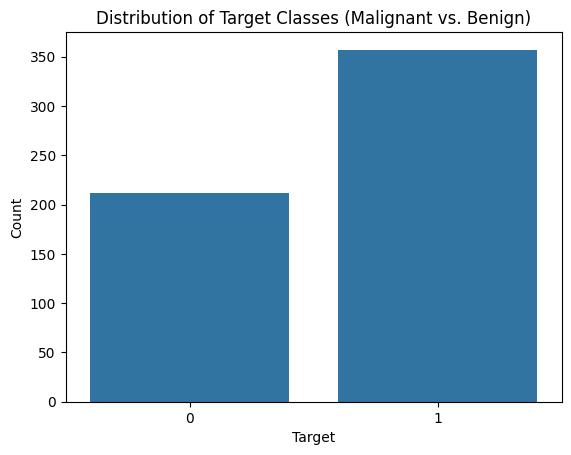

In [6]:
# Visualize the distribution of target classes
sns.countplot(x=y, data=df)
plt.title('Distribution of Target Classes (Malignant vs. Benign)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks([0, 1], y.unique())
plt.show()

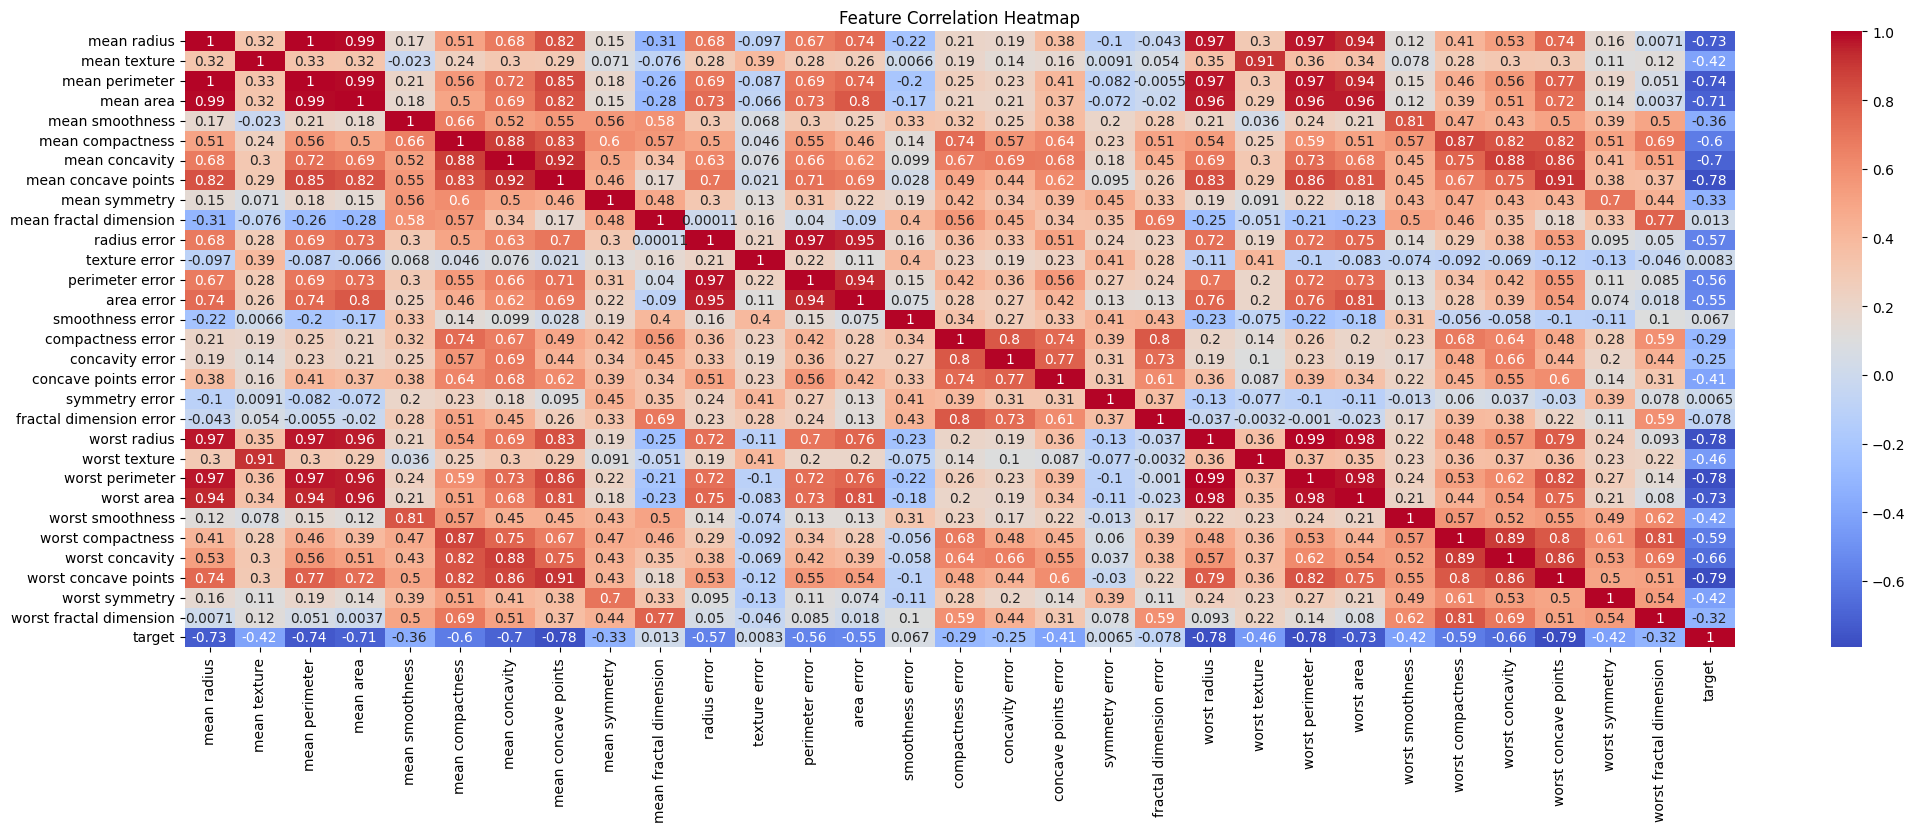

In [7]:
# Correlation heatmap to see feature correlations
plt.figure(figsize=(25, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

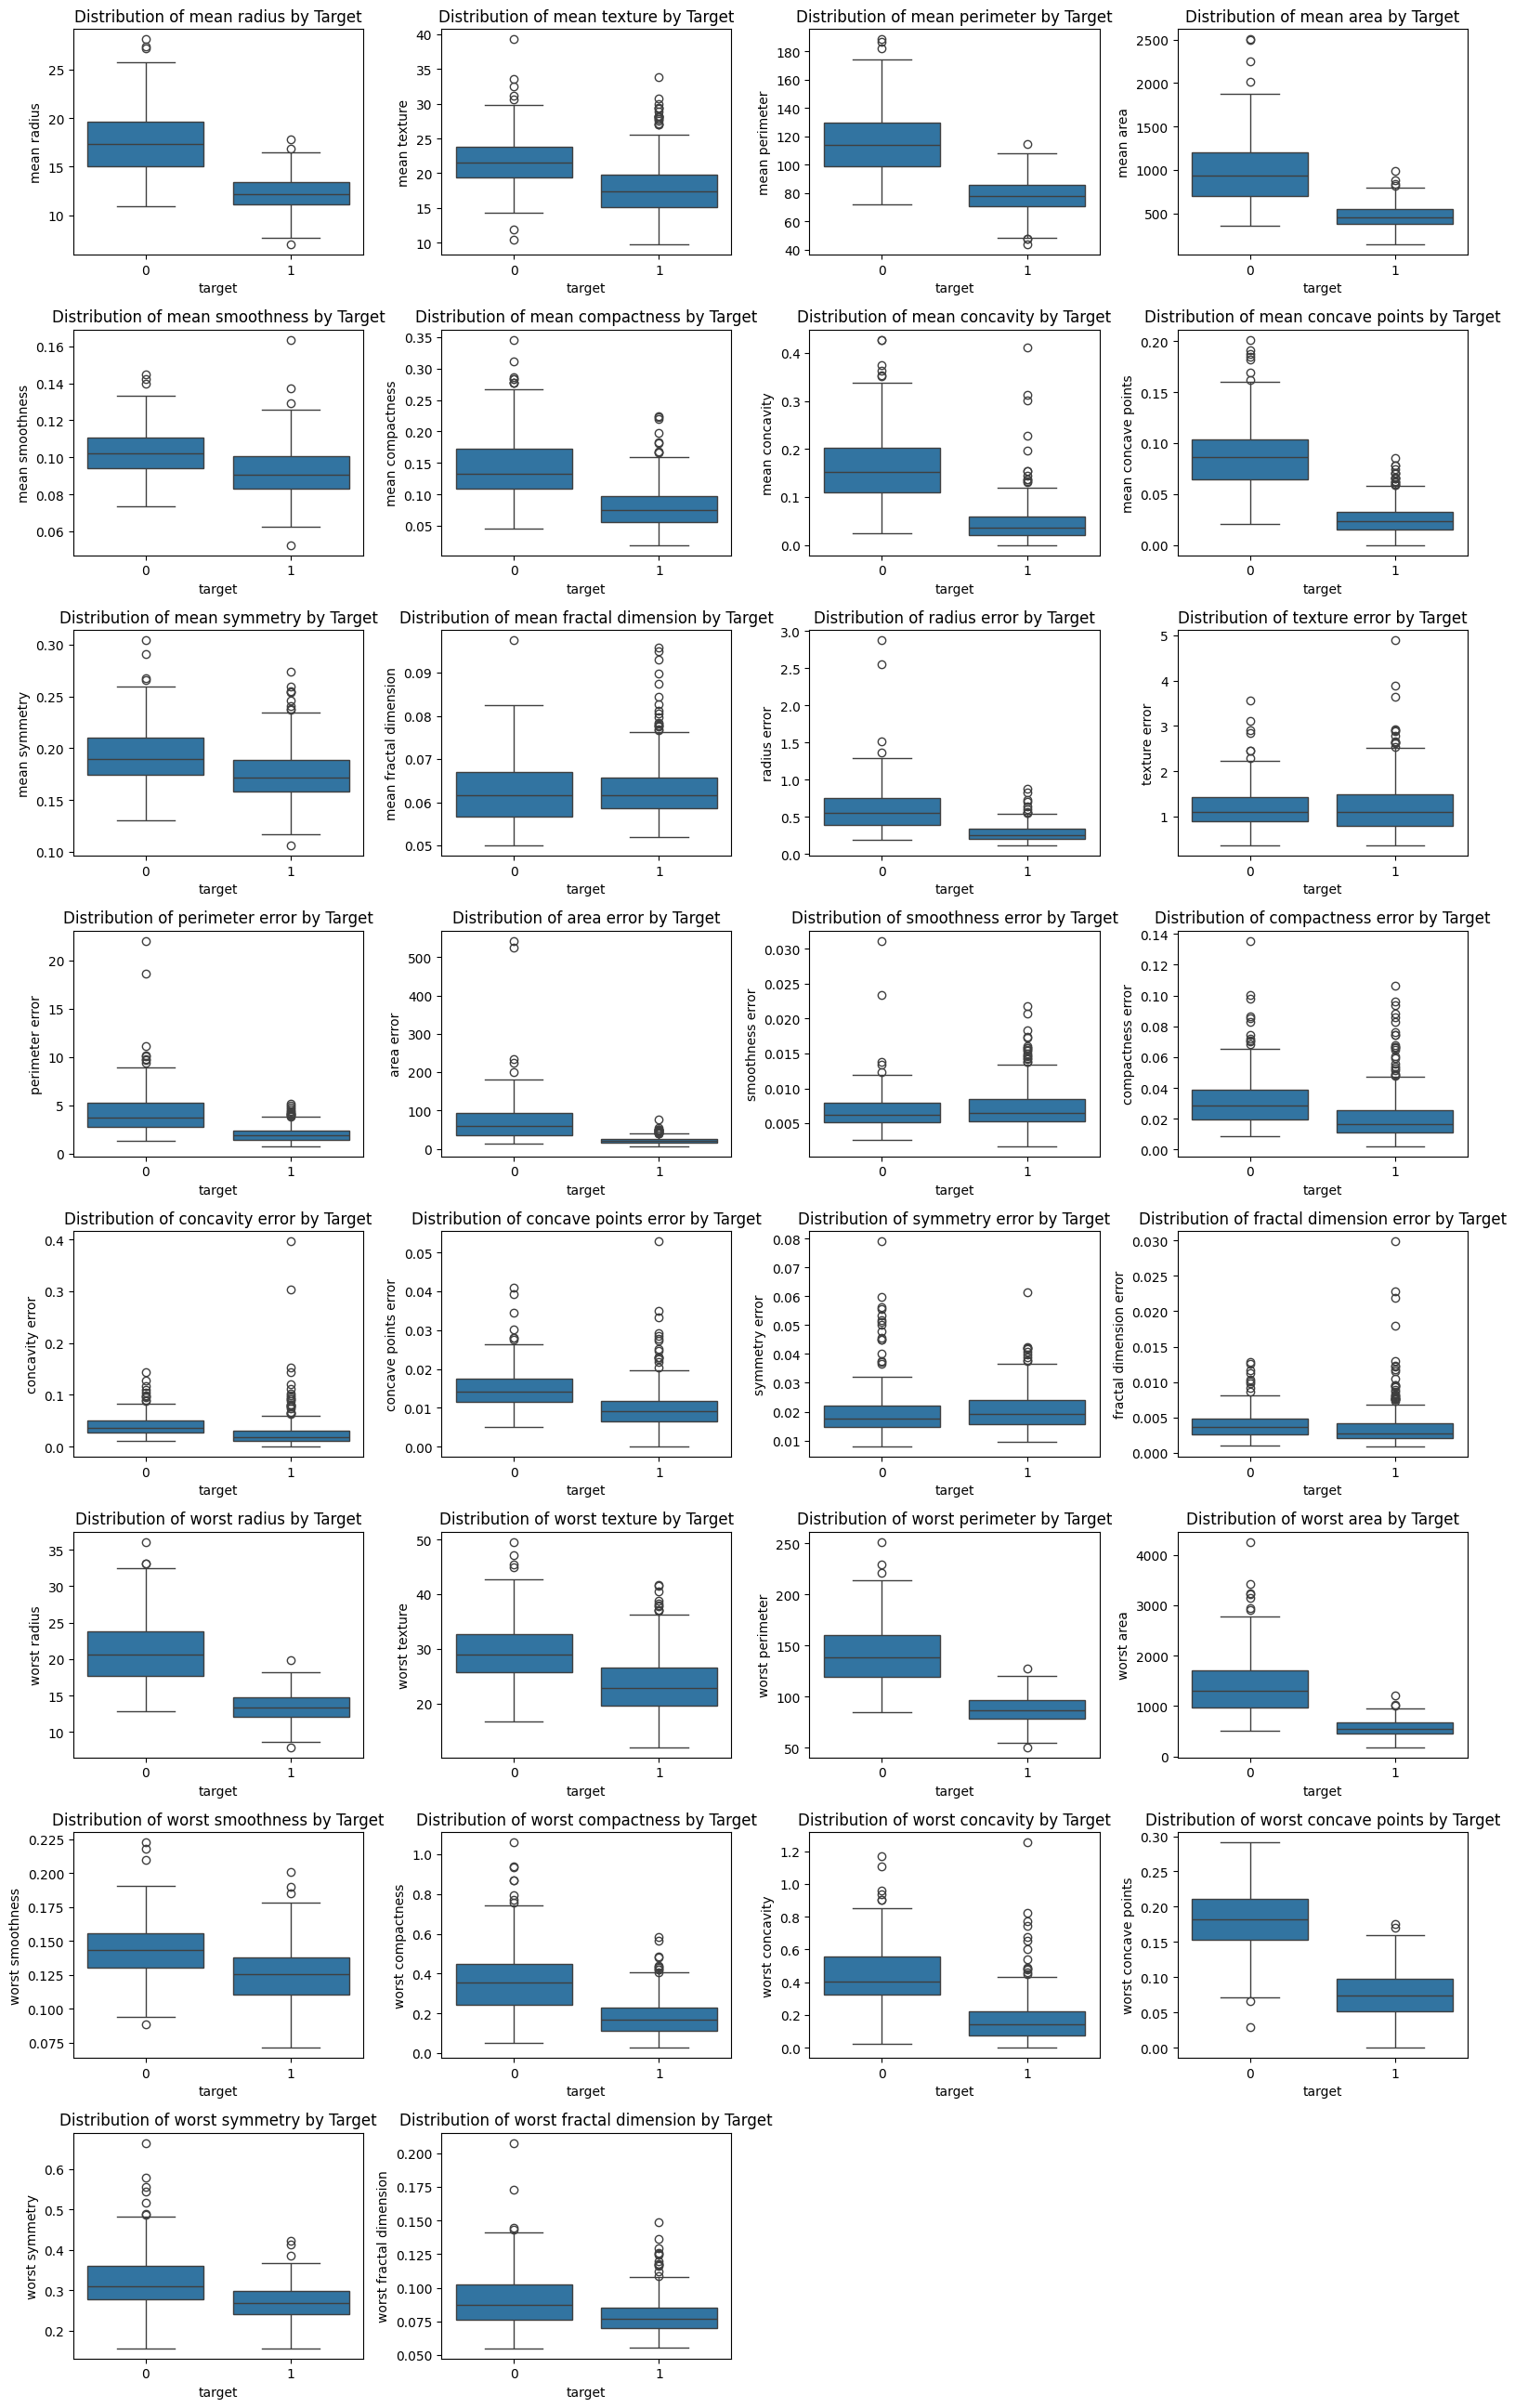

In [8]:
# Box plots to visualize feature distributions by target class
plt.figure(figsize=(16, 100))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(len(df.columns), 4, i + 1)
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Target')
plt.tight_layout()
plt.show()

C:\Users\p12m9\AppData\Local\Temp\ipykernel_3604\1566440477.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target'] == 0][feature], label='Malignant', hist=False)
C:\Users\p12m9\AppData\Local\Temp\ipykernel_3604\1566440477.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

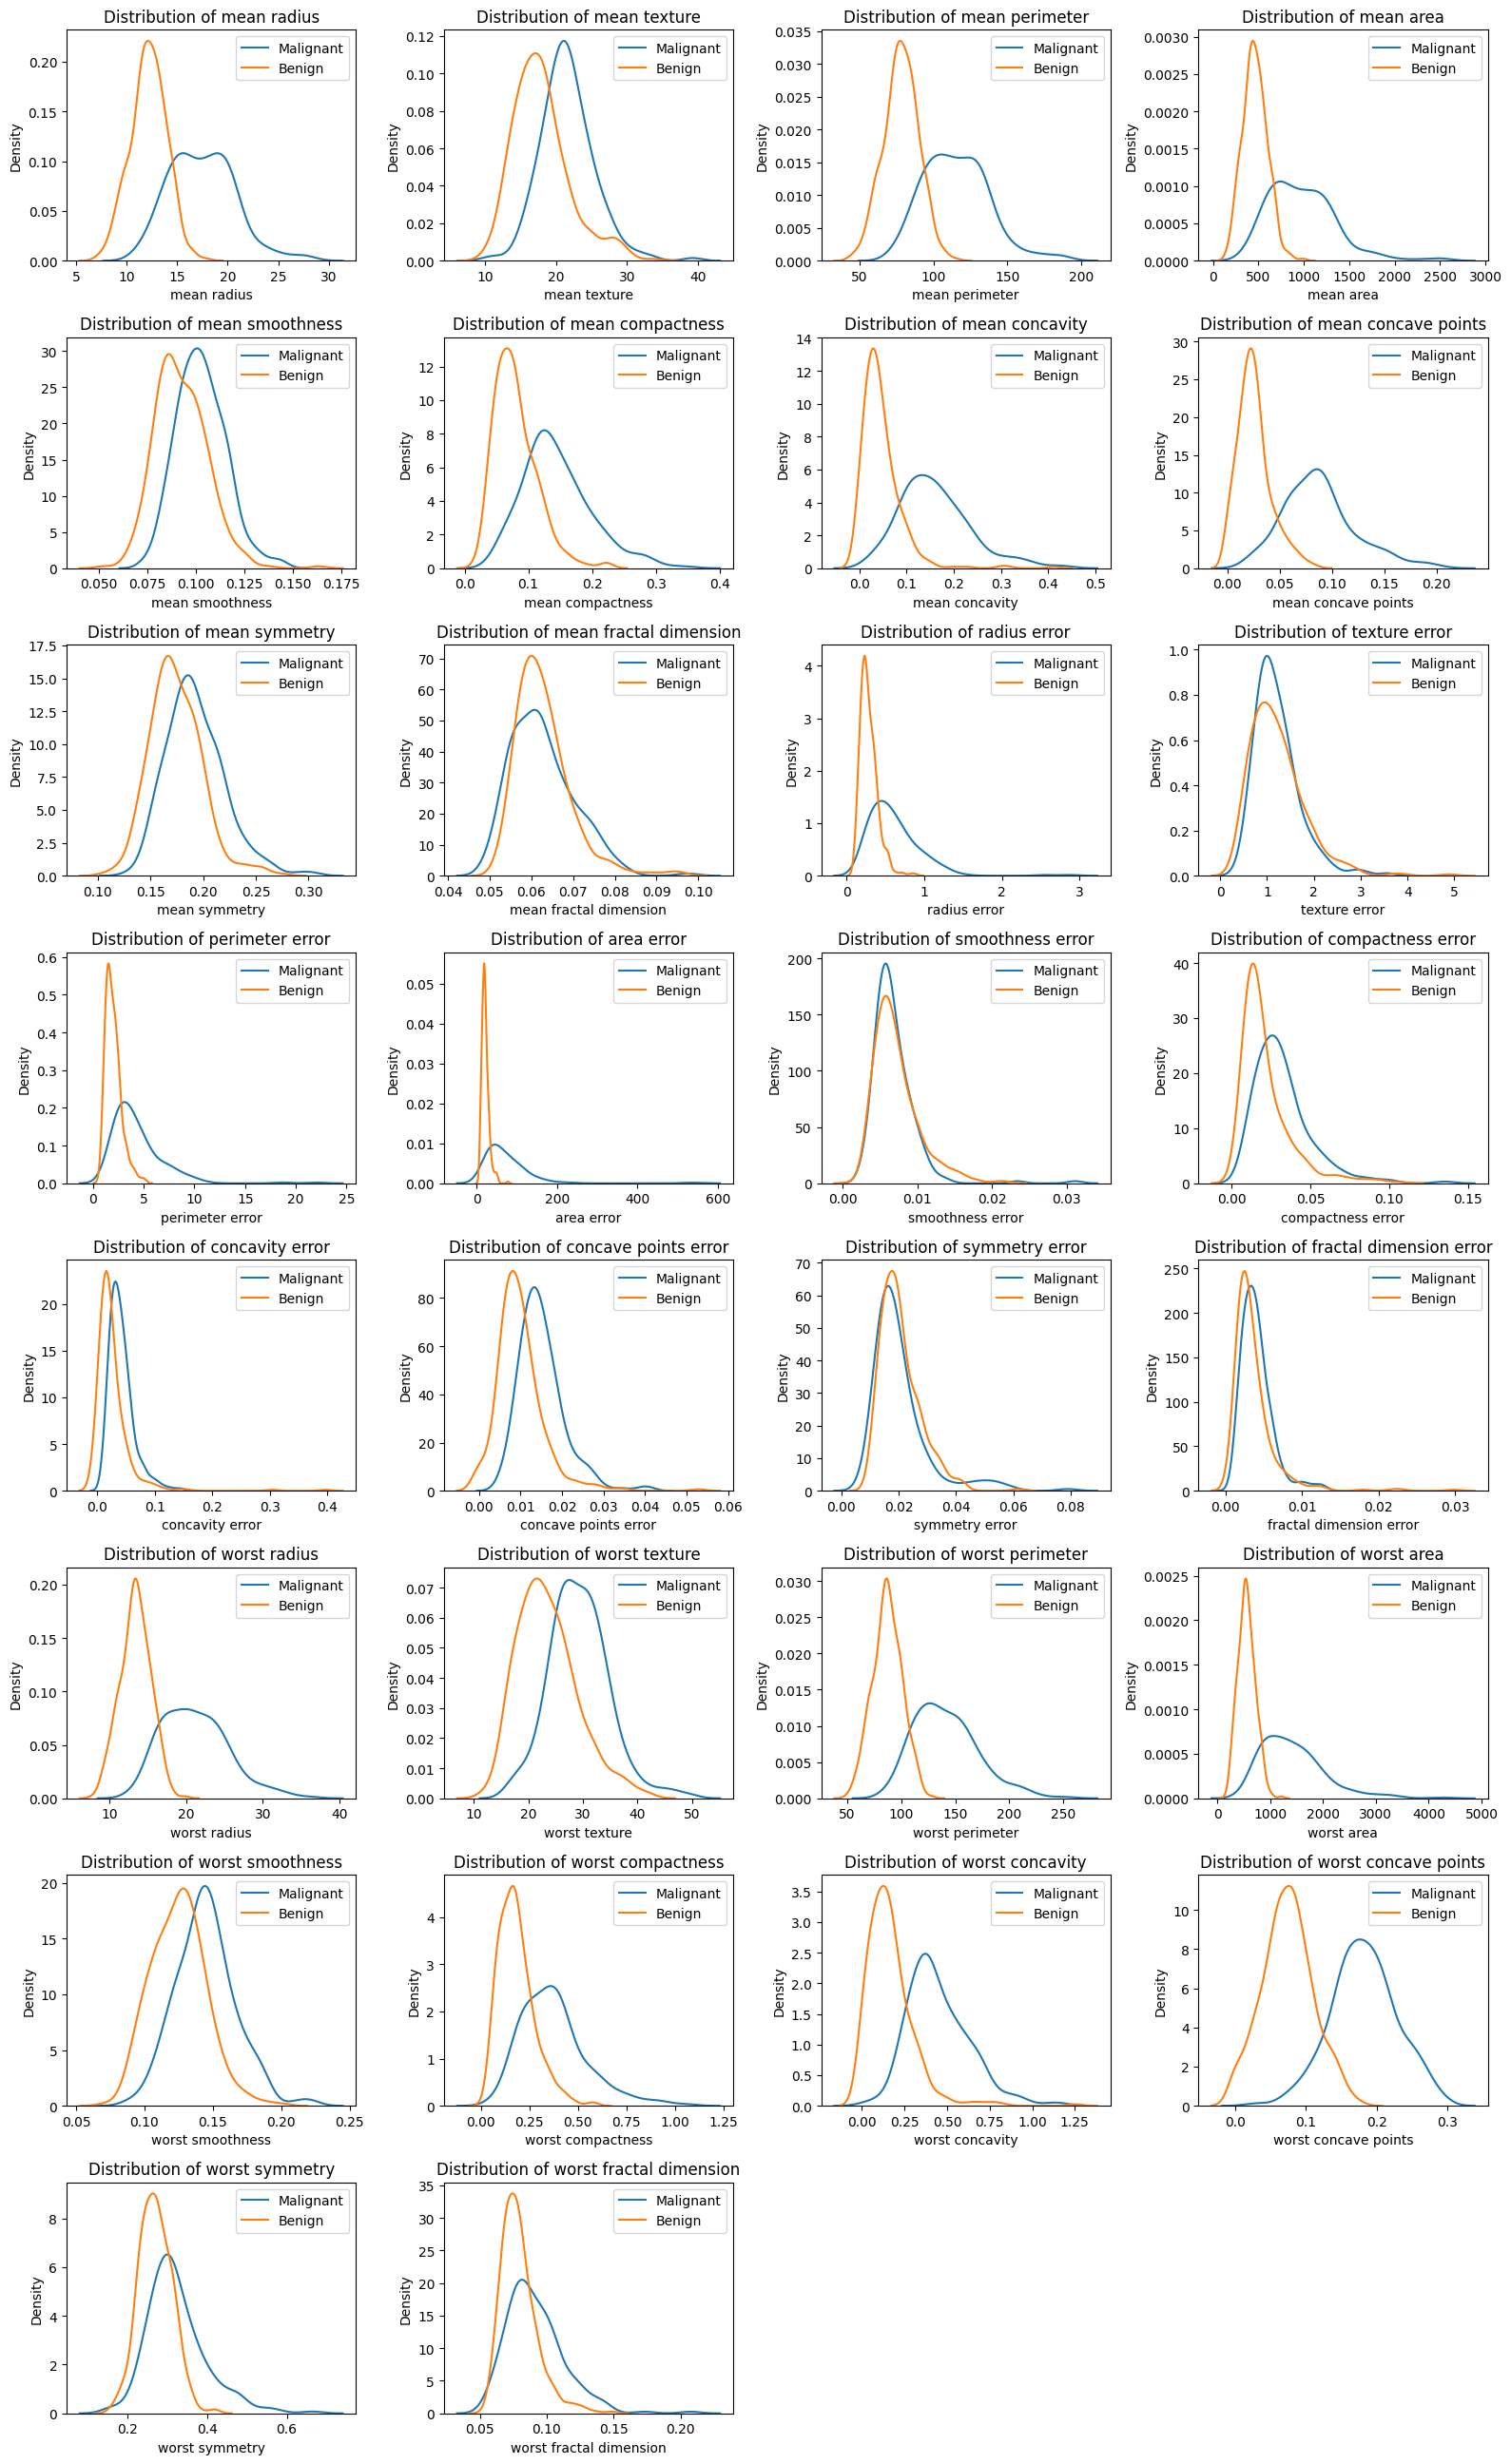

In [9]:
# Loop through each feature and create a distplot
plt.figure(figsize=(16, 100))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(len(df.columns), 4, i + 1)
    sns.distplot(df[df['target'] == 0][feature], label='Malignant', hist=False)
    sns.distplot(df[df['target'] == 1][feature], label='Benign', hist=False)
    plt.title(f'Distribution of {feature}')
    plt.legend()
    
plt.tight_layout()
plt.show()

All columns are noramlly distributed

### Feature Engneering

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from  sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [11]:
# Feature Selection by two method

# SelectKBest
k_best = SelectKBest(score_func=f_classif)
k_best.fit_transform(x, y)
scores = k_best.scores_
result1 = pd.DataFrame({'Feature': x.columns, 'Significance (SelectKBest)': scores})
result1['Rank (SelectKBest)'] = result1['Significance (SelectKBest)'].rank(ascending=False).astype(int)


# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=500,random_state=66)
rf.fit(x,y)
importances = rf.feature_importances_
result2 = pd.DataFrame({'Feature': x.columns, 'Significance (RF)': importances})
result2['Rank (RF)'] = result2['Significance (RF)'].rank(ascending=False).astype(int)
result2 = result2.sort_values(by='Rank (RF)')

comparison_result = pd.merge(result2,result1, on='Feature')
comparison_result.head(10)

,Feature,Significance (RF),Rank (RF),Significance (SelectKBest),Rank (SelectKBest)
0,worst radius,0.130273,1,860.781707,4
1,worst area,0.129622,2,661.600206,6
2,worst perimeter,0.122275,3,897.944219,2
3,mean concave points,0.106548,4,861.676020,3
4,worst concave points,0.103178,5,964.385393,1
5,mean concavity,0.049064,6,533.793126,9
6,mean perimeter,0.048354,7,697.235272,5
7,mean area,0.044520,8,573.060747,8
8,mean radius,0.042205,9,646.981021,7
9,worst concavity,0.036265,10,436.691939,10


In [12]:
top5 = ['worst concave points', 'worst area', 'worst perimeter', 'worst radius', 'mean concave points']
X = df[top5]

# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=47)

**We are selecting 5 features as both is shown equally important in both methods:**
* worst concave points
* worst area
* worst perimeter
* worst radius
* mean concave points

In [13]:
# Scaling the datasets
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [14]:
# Dimensionality Reduction (PCA)
pca = PCA(n_components=5)
x_tr = pca.fit_transform(X_train)
x_tt = pca.transform(X_test)

### Model Training

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [16]:
# Define a list of models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Classifier', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB())]

reports = []

# Train and evaluate each model
for name, m in models:
    m.fit(x_tr, y_train)
    
    # Predictions and evaluation
    y_pred = m.predict(x_tt)
    cv_scores = cross_val_score(m, x_tr, y_train, cv=10)
    accuracy_cv = cv_scores.mean()
    accuracy = accuracy_score(y_test, y_pred)
    r = classification_report(y_test, y_pred, output_dict=True)

    # Add results to the list
    reports.append({'Model': name, 'Accuracy': accuracy, 'Precision': r['weighted avg']['precision'],
        'Recall': r['weighted avg']['recall'], 'F1-Score': r['weighted avg']['f1-score'], 'Accuracy (CV)': accuracy_cv})

# Create a DataFrame from the results list
report = pd.DataFrame(reports)

# Display the results DataFrame
report.head(10)

,Model,Accuracy,Precision,Recall,F1-Score,Accuracy (CV)
0,Logistic Regression,0.923077,0.924061,0.923077,0.922354,0.953156
1,Decision Tree,0.937063,0.936952,0.937063,0.936959,0.929457
2,Random Forest,0.944056,0.944824,0.944056,0.943649,0.955482
3,Support Vector Classifier,0.937063,0.938352,0.937063,0.936471,0.957697
4,K-Nearest Neighbors,0.944056,0.944065,0.944056,0.943865,0.938815
5,Naive Bayes,0.902098,0.903040,0.902098,0.902387,0.934219


So, based on above comparison we are opting these 4 models:
* **Random Forest**
* **Decision Tree**
* **Support Vector Classifier**
* **K-Nearest Neighbors**